# 1. Import Libraries, Define Functions

In [6]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# set the default precision to one decimal place
pd.set_option('display.float_format', '{:.2f}'.format)

In [21]:
def load_data():
    df_preprocessed = pd.read_csv('data/df_preprocessed.csv', index_col=0, parse_dates=True)
    
    return df_preprocessed

def add_day_of_week_flag(df):
    # Create flags based on day of the week
    # To check if day of day affects air quality, such as more traffic, more factory activities, etc.
    # 2019-01-01 = Tuesday
    # 2019-01-02 = Wednesday
    # 2019-01-03 = Thursday
    # 2019-01-04 = Friday
    # 2019-01-05 = Sataturday
    # 2019-01-06 = Sunday

    df["Mon"] = 0
    df.loc[df.index.weekday == 0, "Mon"] = 1

    df["Tue"] = 0
    df.loc[df.index.weekday == 1, "Tue"] = 1

    df["Wed"] = 0
    df.loc[df.index.weekday == 2, "Wed"] = 1

    df["Thu"] = 0
    df.loc[df.index.weekday == 3, "Thu"] = 1

    df["Fri"] = 0
    df.loc[df.index.weekday == 4, "Fri"] = 1

    df["Sat"] = 0
    df.loc[df.index.weekday == 5, "Sat"] = 1

    df["Sun"] = 0
    df.loc[df.index.weekday == 6, "Sun"] = 1

    df["Weekend"] = df["Sat"] + df["Sun"]
    df["Sudo_Weekend"] = df["Fri"] + df["Sat"] + df["Sun"]
    
    return df

def vif(df):
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif["features"] = df.columns

    # print the VIF dataframe
    print(vif)

def heatmap(df, width=8, height=8):
    fig, ax = plt.subplots(figsize=(width, height))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=ax)

def univariate_plot(df, y, width=8, height=6):
    plt.plot(df[y])
    
    fig = plt.gcf()
    fig.set_size_inches(width, height)
    plt.ylabel(y)
    plt.show()

def multivariate_plot(df, y1, y2, width=8, height=5, norm=False):
    df_copy = df.copy()
    
    if norm == True:
        scaler = StandardScaler()
        df_copy[[y1,y2]] = scaler.fit_transform(df_copy[[y1,y2]])
    
    df_copy.plot(y=[y1, y2])
    
    fig = plt.gcf()
    fig.set_size_inches(width, height)
    
    plt.legend([y1, y2])
    plt.show() 
    
def scatter_plot(df, x, y, width=6, height=6):
    # Scatterplot of PM2.5 levels and temperature
    sns.scatterplot(data=df, x=x, y=y)
    
    # create a figure object with a size of 10 inches by 8 inches
    fig = plt.gcf()
    fig.set_size_inches(width, height)
    
    # Labels
    plt.title(f'Scatterplot of {x} and {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    
    plt.show()

# 2. Feature Engineering

In [14]:
df_preprocessed = load_data()

### 2.1 Add weekday and weekend variables

In [17]:
df_days = add_day_of_week_flag(df_preprocessed)

In [18]:
df_days.head(20)

,PM25_UG_PER_CUBIC_METER,TEMPERATURE_CELSIUS,WIND_SPEED_METERS_PER_SECOND,OZONE_PPM,NO2_PPB,CO_PPM,SO2_PPB,Mon,Tue,Wed,Thu,Fri,Sat,Sun,Weekend,Sudo_Weekend
datetime,,,,,,,,,,,,,,,,
2019-01-01,9.55,6.60,1.43,0.03,13.36,0.45,0.45,0,1,0,0,0,0,0,0,0
2019-01-02,9.55,6.60,1.43,0.03,13.36,0.45,0.45,0,0,1,0,0,0,0,0,0
2019-01-03,8.32,10.55,1.42,0.03,25.79,0.62,0.44,0,0,0,1,0,0,0,0,0
2019-01-04,12.60,8.61,2.04,0.02,27.74,0.76,0.61,0,0,0,0,1,0,0,0,1
2019-01-05,13.85,8.25,2.35,0.03,20.11,0.65,0.43,0,0,0,0,0,1,0,1,1
2019-01-06,5.23,10.87,1.26,0.04,8.48,0.30,0.05,0,0,0,0,0,0,1,1,1
2019-01-07,3.90,11.88,2.24,0.03,12.07,0.39,0.12,1,0,0,0,0,0,0,0,0
2019-01-08,6.85,11.97,2.26,0.03,19.63,0.55,0.26,0,1,0,0,0,0,0,0,0
2019-01-09,14.37,13.48,1.14,0.02,23.70,0.74,0.39,0,0,1,0,0,0,0,0,0


In [19]:
df_days.columns

Index(['PM25_UG_PER_CUBIC_METER', 'TEMPERATURE_CELSIUS',
       'WIND_SPEED_METERS_PER_SECOND', 'OZONE_PPM', 'NO2_PPB', 'CO_PPM',
       'SO2_PPB', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'Weekend',
       'Sudo_Weekend'],
      dtype='object')

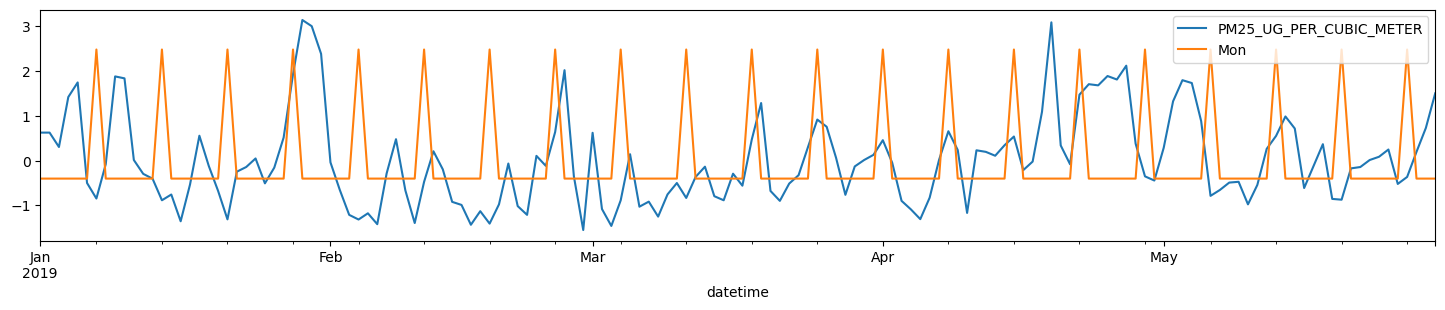

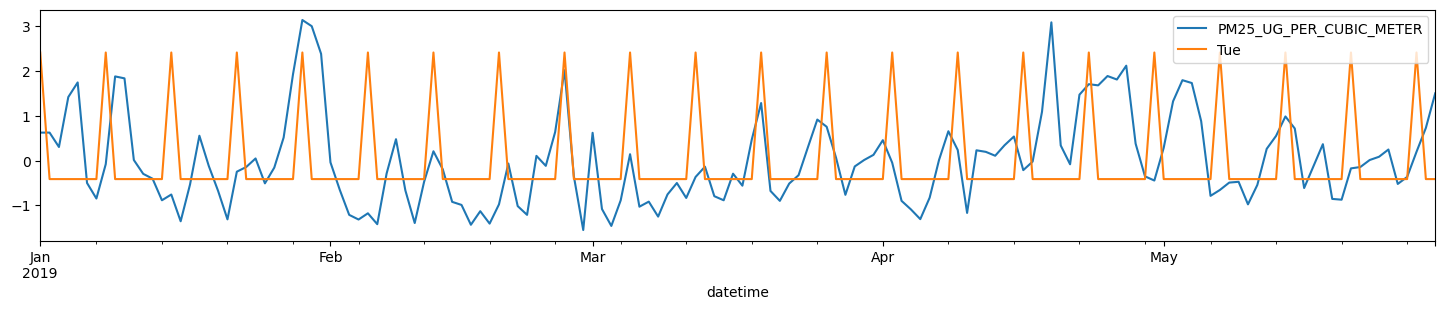

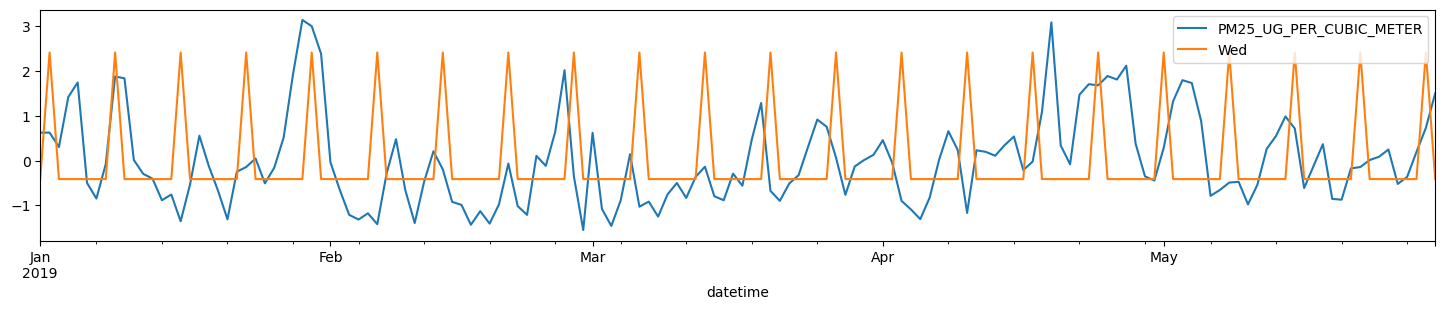

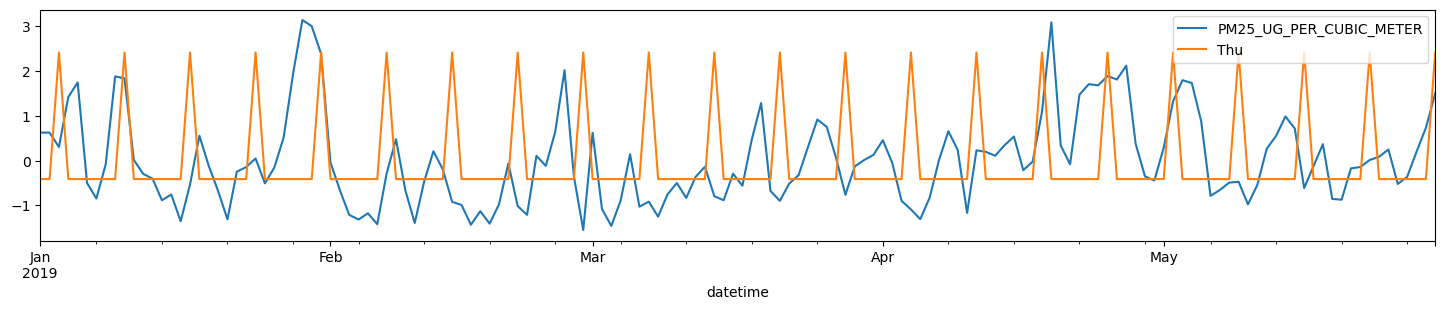

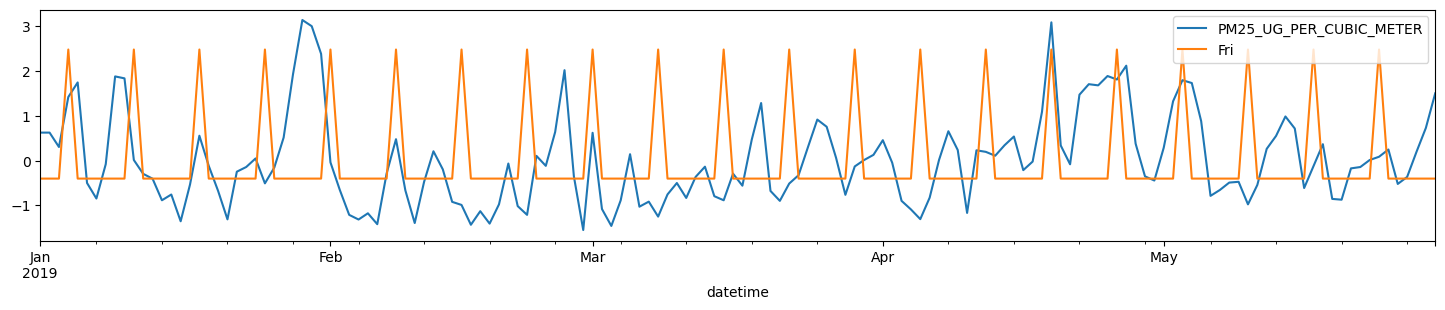

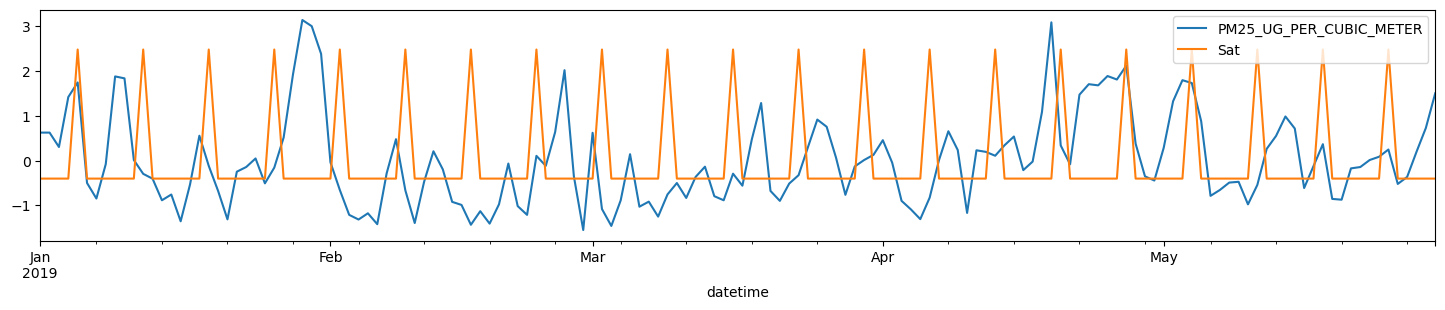

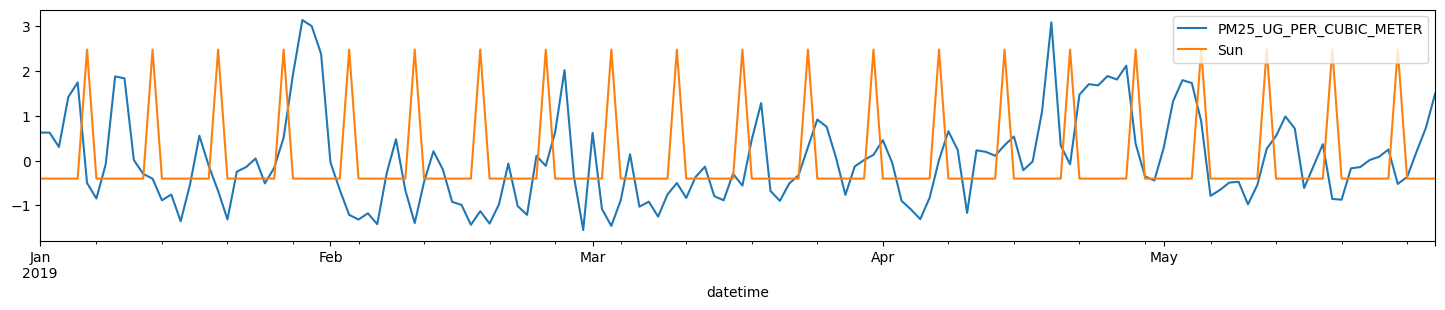

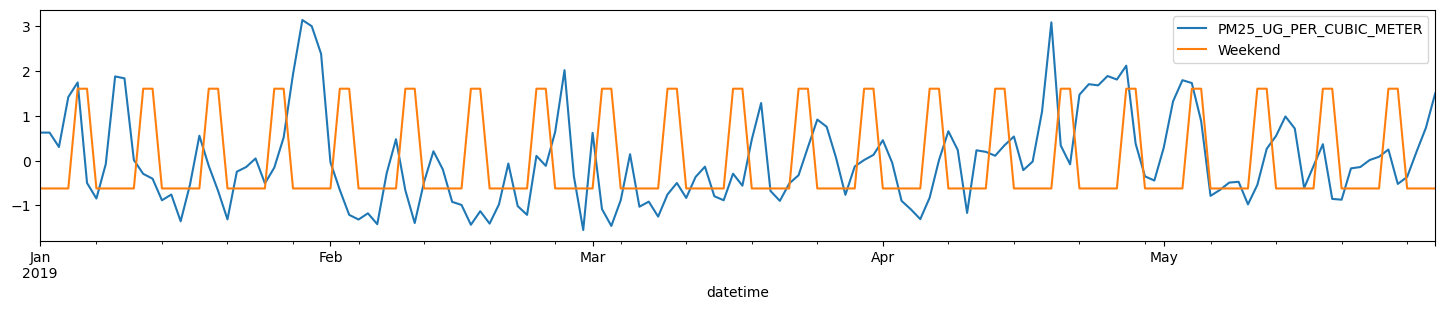

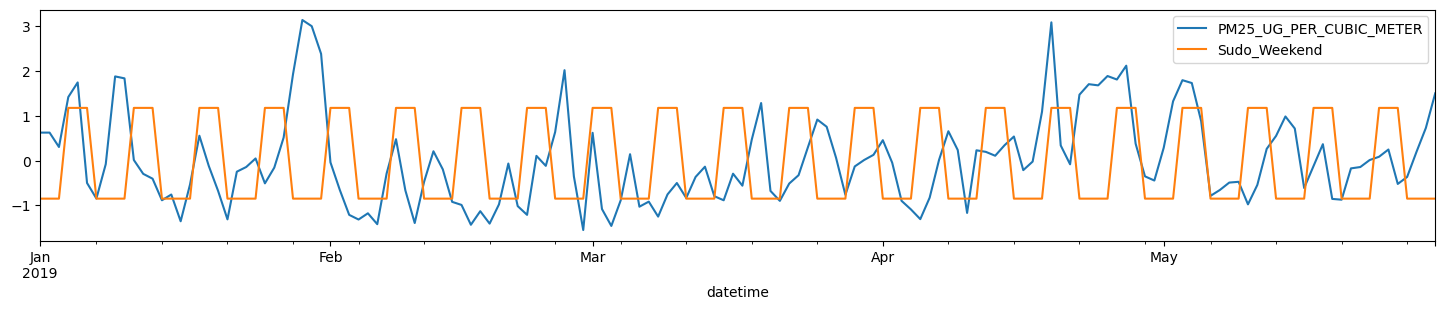

In [23]:
for day in ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'Weekend', 'Sudo_Weekend']:
    multivariate_plot(df_days[:150], 'PM25_UG_PER_CUBIC_METER', day, 18, 3, norm=True)

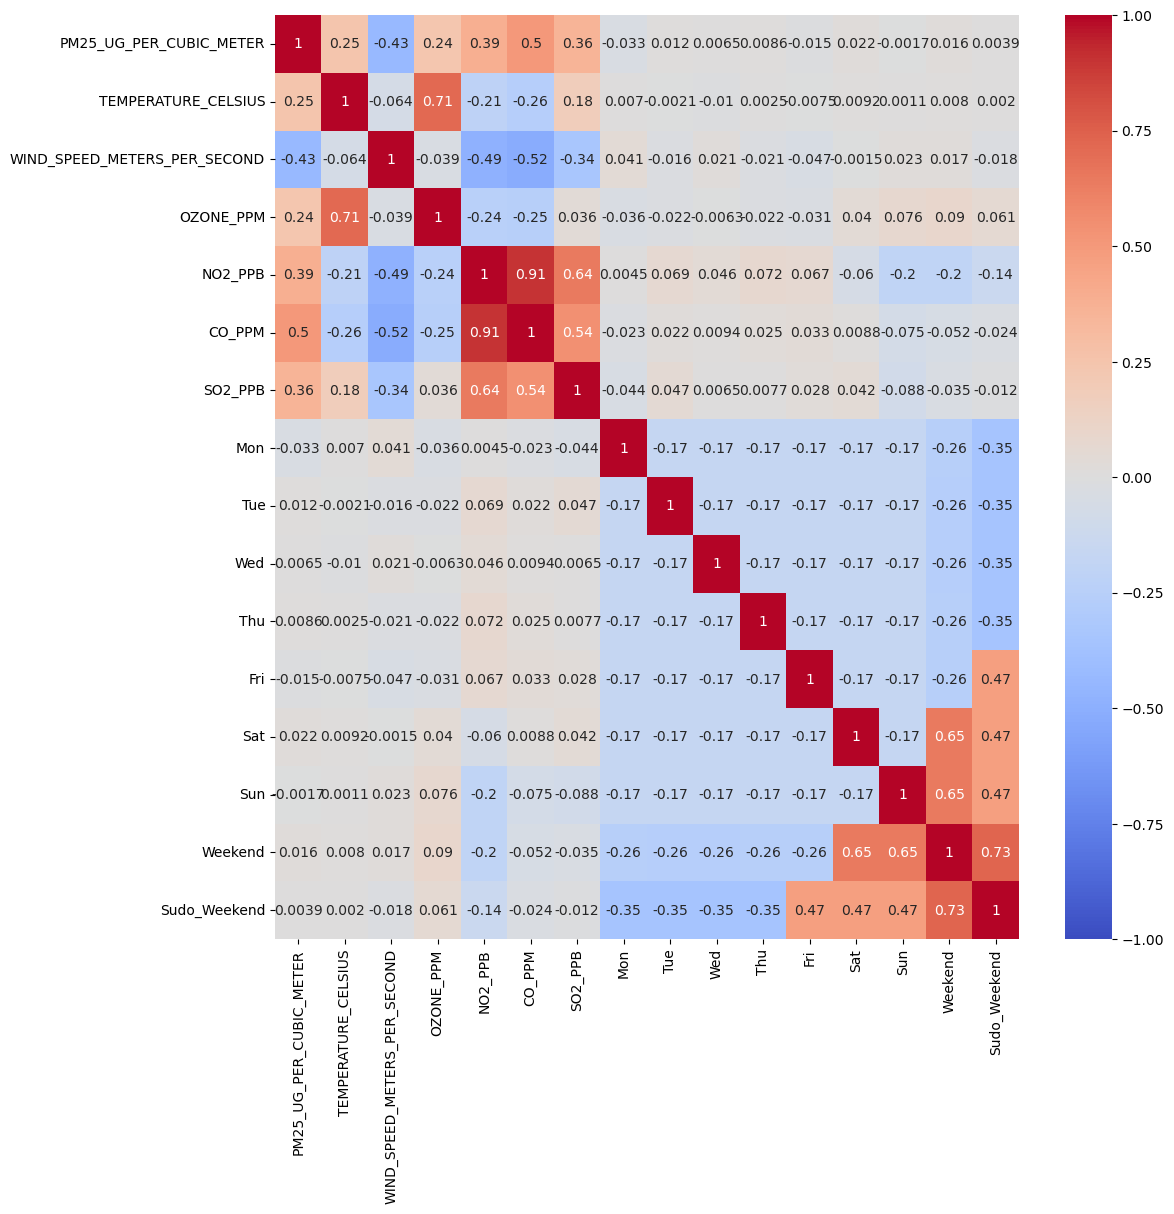

In [24]:
heatmap(df_days, 12, 12)

In [ ]:
# Conclusion
# It seems like the day of the week is not an important factor, so we will not use them

### 2.2 Add Lagging Target Variable

In [ ]:
df_preprocessed_lags = df_preprocessed.copy()

In [ ]:
df_preprocessed_lags["PM25_1_week_ago"] = df_preprocessed_lags['PM25_UG_PER_CUBIC_METER'][0]
df_preprocessed_lags["PM25_1_week_ago"][7:] = df_preprocessed_lags['PM25_UG_PER_CUBIC_METER'][:-7]

In [ ]:
df_preprocessed_lags[["PM25_UG_PER_CUBIC_METER", "PM25_1_week_ago"]].head(20)

,PM25_UG_PER_CUBIC_METER,PM25_1_week_ago
datetime,,
2019-01-01,9.55,9.55
2019-01-02,9.55,9.55
2019-01-03,8.32,9.55
2019-01-04,12.60,9.55
2019-01-05,13.85,9.55
2019-01-06,5.23,9.55
2019-01-07,3.90,9.55
2019-01-08,6.85,9.55
2019-01-09,14.37,9.55


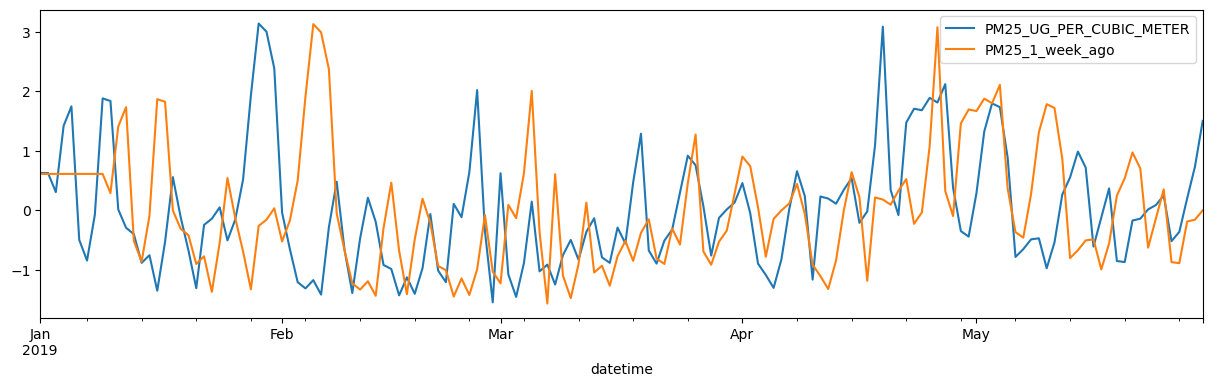

In [ ]:
multivariate_plot(df_preprocessed_lags[:150], 'PM25_UG_PER_CUBIC_METER', 'PM25_1_week_ago', 15, 4, norm=True)

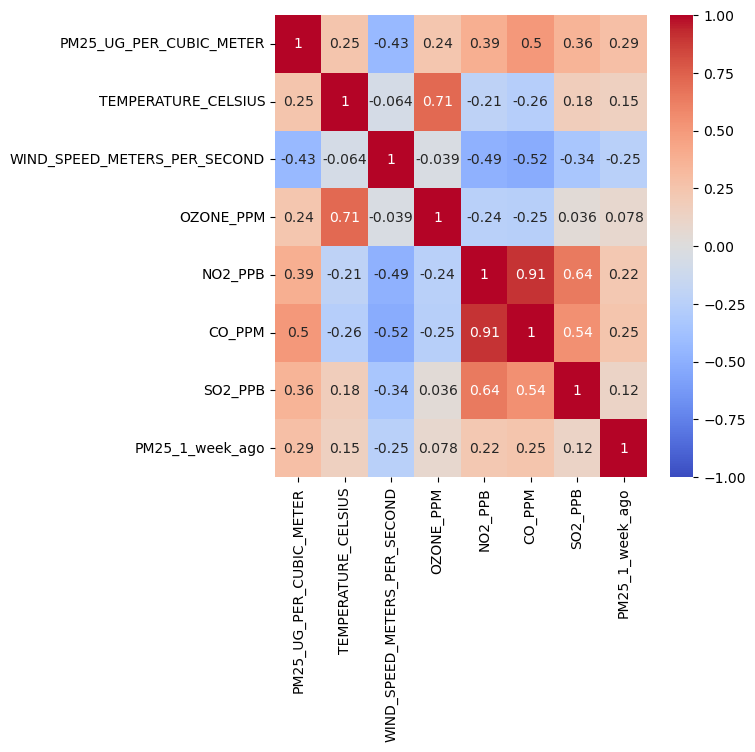

In [ ]:
heatmap(df_preprocessed_lags, 6, 6)

In [ ]:
vif(df_preprocessed_lags)

   VIF Factor                      features
0        6.22       PM25_UG_PER_CUBIC_METER
1       28.47           TEMPERATURE_CELSIUS
2        8.21  WIND_SPEED_METERS_PER_SECOND
3       26.92                     OZONE_PPM
4       31.25                       NO2_PPB
5       28.00                        CO_PPM
6        5.31                       SO2_PPB
7        3.80               PM25_1_week_ago


### 2.3 Take Log and Exponent of existing variables

In [ ]:
df_preprocessed_lags.columns

Index(['PM25_UG_PER_CUBIC_METER', 'TEMPERATURE_CELSIUS',
       'WIND_SPEED_METERS_PER_SECOND', 'OZONE_PPM', 'NO2_PPB', 'CO_PPM',
       'SO2_PPB', 'PM25_1_week_ago'],
      dtype='object')

In [ ]:
df_preprocessed_copy = df_preprocessed_lags.copy()

df_preprocessed_copy["TEMPERATURE_CELSIUS_sq"] = df_preprocessed_copy["TEMPERATURE_CELSIUS"] ** 2
df_preprocessed_copy["TEMPERATURE_CELSIUS_log"] = np.log10(df_preprocessed_copy["TEMPERATURE_CELSIUS"])

df_preprocessed_copy["WIND_SPEED_METERS_PER_SECOND_sq"] = df_preprocessed_copy["WIND_SPEED_METERS_PER_SECOND"] ** 2
df_preprocessed_copy["WIND_SPEED_METERS_PER_SECOND_log"] = np.log10(df_preprocessed_copy["WIND_SPEED_METERS_PER_SECOND"])

df_preprocessed_copy["OZONE_PPM_sq"] = df_preprocessed_copy["OZONE_PPM"] ** 2
df_preprocessed_copy["OZONE_PPM_log"] = np.log10(df_preprocessed_copy["OZONE_PPM"])

df_preprocessed_copy["NO2_PPB_sq"] = df_preprocessed_copy["NO2_PPB"] ** 2
df_preprocessed_copy["NO2_PPB_log"] = np.log10(df_preprocessed_copy["NO2_PPB"])

df_preprocessed_copy["CO_PPM_sq"] = df_preprocessed_copy["CO_PPM"] ** 2
df_preprocessed_copy["CO_PPM_log"] = np.log10(df_preprocessed_copy["CO_PPM"])

df_preprocessed_copy["SO2_PPB_sq"] = df_preprocessed_copy["SO2_PPB"] ** 2
df_preprocessed_copy["SO2_PPB_log"] = np.log10(df_preprocessed_copy["SO2_PPB"])

/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


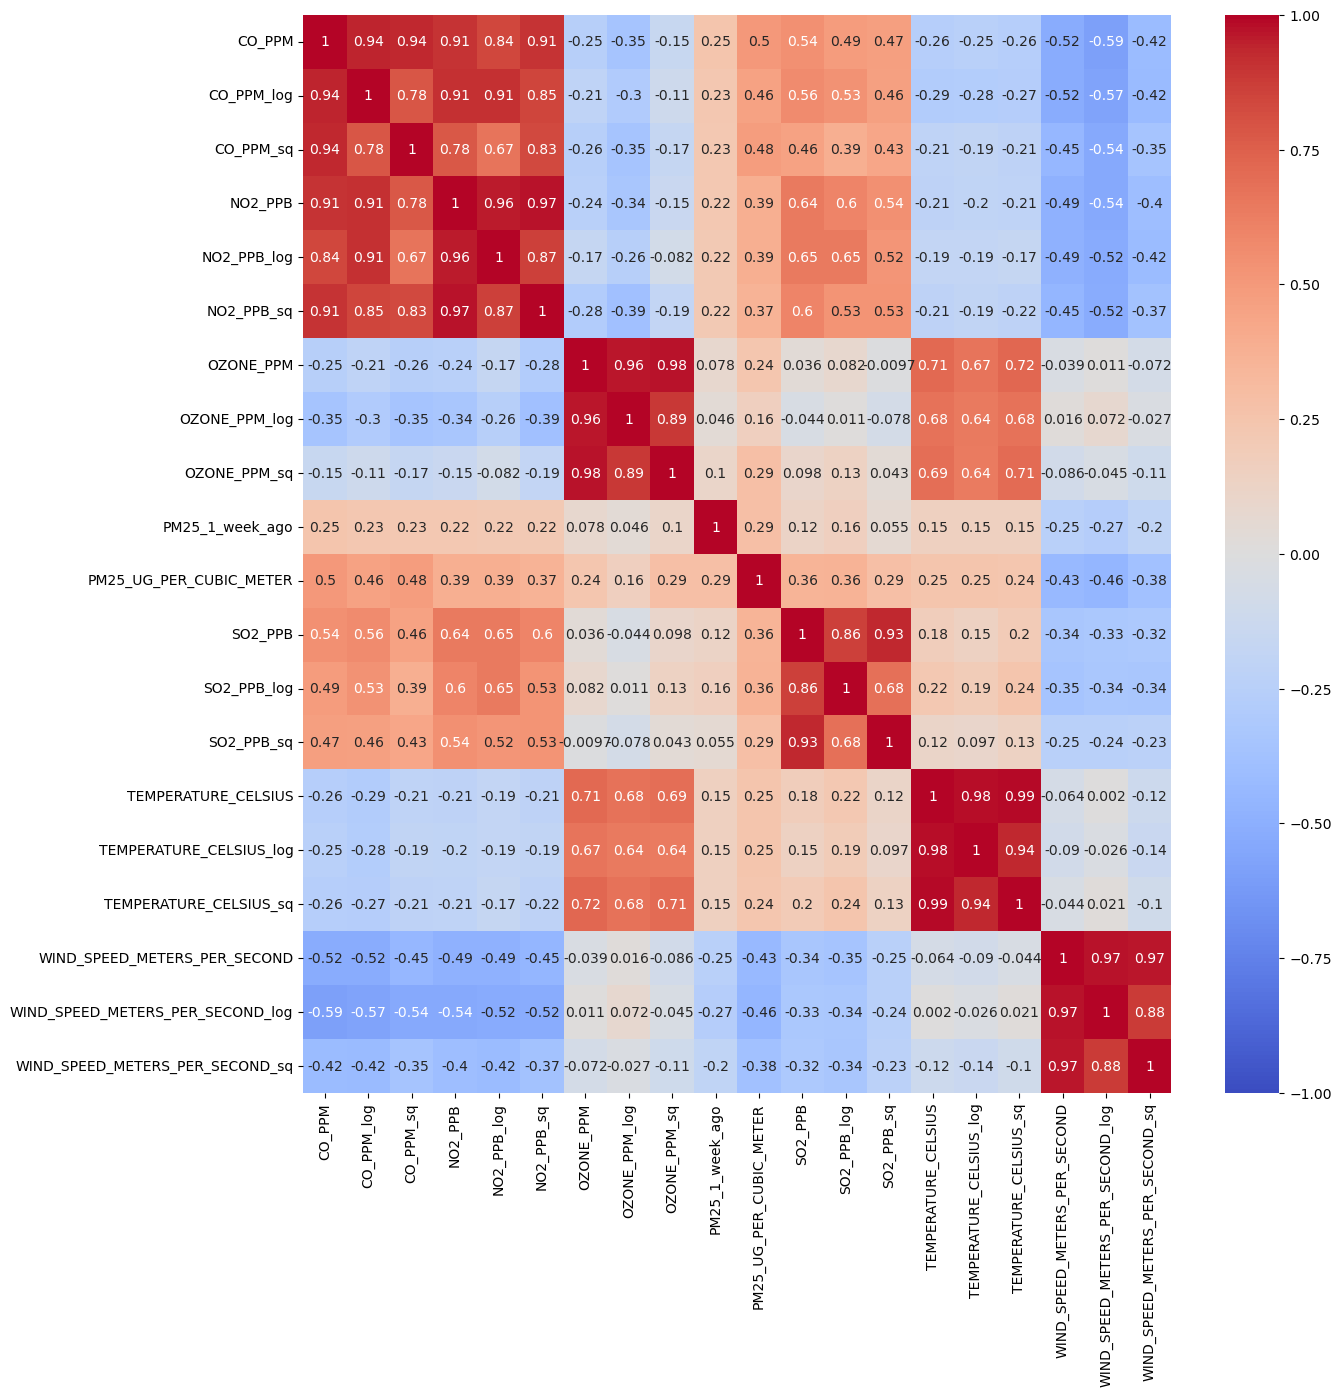

In [ ]:
heatmap(df_preprocessed_copy[sorted(list(df_preprocessed_copy.columns))], 14, 14)
# No clear correlation

In [ ]:
# We notice that some versions (sq and log) have higher correlation coefficient values that their original variable
df_preprocessed_copy[sorted(list(df_preprocessed_copy.columns))].corr()["PM25_UG_PER_CUBIC_METER"]

CO_PPM                              0.50
CO_PPM_log                          0.46
CO_PPM_sq                           0.48
NO2_PPB                             0.39
NO2_PPB_log                         0.39
NO2_PPB_sq                          0.37
OZONE_PPM                           0.24
OZONE_PPM_log                       0.16
OZONE_PPM_sq                        0.29
PM25_1_week_ago                     0.29
PM25_UG_PER_CUBIC_METER             1.00
SO2_PPB                             0.36
SO2_PPB_log                         0.36
SO2_PPB_sq                          0.29
TEMPERATURE_CELSIUS                 0.25
TEMPERATURE_CELSIUS_log             0.25
TEMPERATURE_CELSIUS_sq              0.24
WIND_SPEED_METERS_PER_SECOND       -0.43
WIND_SPEED_METERS_PER_SECOND_log   -0.46
WIND_SPEED_METERS_PER_SECOND_sq    -0.38
Name: PM25_UG_PER_CUBIC_METER, dtype: float64

In [ ]:
# Select feature variation with the highest (absolute) value
# CO_PPM                              0.50 o
# CO_PPM_log                          0.46
# CO_PPM_sq                           0.48
# NO2_PPB                             0.39 o
# NO2_PPB_log                         0.39
# NO2_PPB_sq                          0.37
# OZONE_PPM                           0.24
# OZONE_PPM_log                       0.16
# OZONE_PPM_sq                        0.29 o
# PM25_1_week_ago                     0.29 o
# PM25_UG_PER_CUBIC_METER             1.00 o
# SO2_PPB                             0.36 o
# SO2_PPB_log                         0.36
# SO2_PPB_sq                          0.29
# TEMPERATURE_CELSIUS                 0.25 o
# TEMPERATURE_CELSIUS_log             0.25
# TEMPERATURE_CELSIUS_sq              0.24
# WIND_SPEED_METERS_PER_SECOND       -0.43
# WIND_SPEED_METERS_PER_SECOND_log   -0.46 o
# WIND_SPEED_METERS_PER_SECOND_sq    -0.38

In [ ]:
df = df_preprocessed_copy[["PM25_UG_PER_CUBIC_METER", "PM25_1_week_ago", "CO_PPM", "NO2_PPB", "OZONE_PPM_sq", "SO2_PPB", "TEMPERATURE_CELSIUS", "WIND_SPEED_METERS_PER_SECOND_log"]]

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PM25_UG_PER_CUBIC_METER,730.00,10.99,7.28,1.20,6.95,9.53,13.00,78.43
PM25_1_week_ago,730.00,10.97,7.26,1.20,6.97,9.54,12.92,78.43
CO_PPM,730.00,0.36,0.22,0.05,0.21,0.29,0.48,1.73
NO2_PPB,730.00,13.43,7.32,2.08,7.39,11.69,18.84,38.69
OZONE_PPM_sq,730.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01
SO2_PPB,730.00,0.29,0.23,-0.06,0.10,0.24,0.43,1.38
TEMPERATURE_CELSIUS,730.00,18.00,5.42,3.98,13.64,17.62,22.64,34.55
WIND_SPEED_METERS_PER_SECOND_log,730.00,0.17,0.12,-0.29,0.10,0.18,0.25,0.60


In [ ]:
df.columns

Index(['PM25_UG_PER_CUBIC_METER', 'PM25_1_week_ago', 'CO_PPM', 'NO2_PPB',
       'OZONE_PPM_sq', 'SO2_PPB', 'TEMPERATURE_CELSIUS',
       'WIND_SPEED_METERS_PER_SECOND_log'],
      dtype='object')

In [ ]:
df_normed = df.copy()

# select the features to standardize
features = ['PM25_1_week_ago', 'CO_PPM', 'NO2_PPB',
            'OZONE_PPM_sq', 'SO2_PPB', 'TEMPERATURE_CELSIUS',
            'WIND_SPEED_METERS_PER_SECOND_log']

# initialize the scaler
scaler = StandardScaler()

# fit and transform the selected features
df_normed[features] = scaler.fit_transform(df_normed[features])

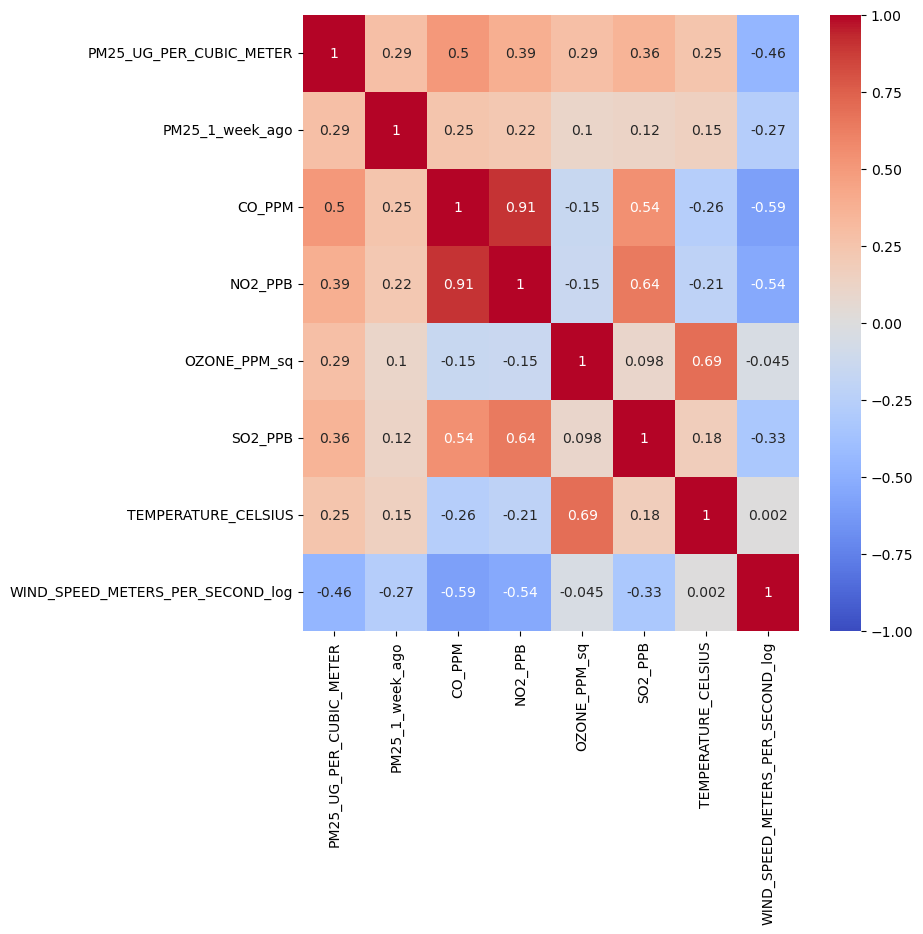

In [ ]:
heatmap(df_normed)
# Seems like NO2 and CO are very similar (over 0.8). Let's decide which one to remove.

In [ ]:
vif(df_normed)
# CO has a lower VIF factor than NO2, therefore we will drop NO2
# We find that all other variables are under the VIF threshold of 10

   VIF Factor                          features
0        1.17           PM25_UG_PER_CUBIC_METER
1        1.16                   PM25_1_week_ago
2        6.80                            CO_PPM
3        7.04                           NO2_PPB
4        1.94                      OZONE_PPM_sq
5        2.11                           SO2_PPB
6        2.43               TEMPERATURE_CELSIUS
7        1.64  WIND_SPEED_METERS_PER_SECOND_log


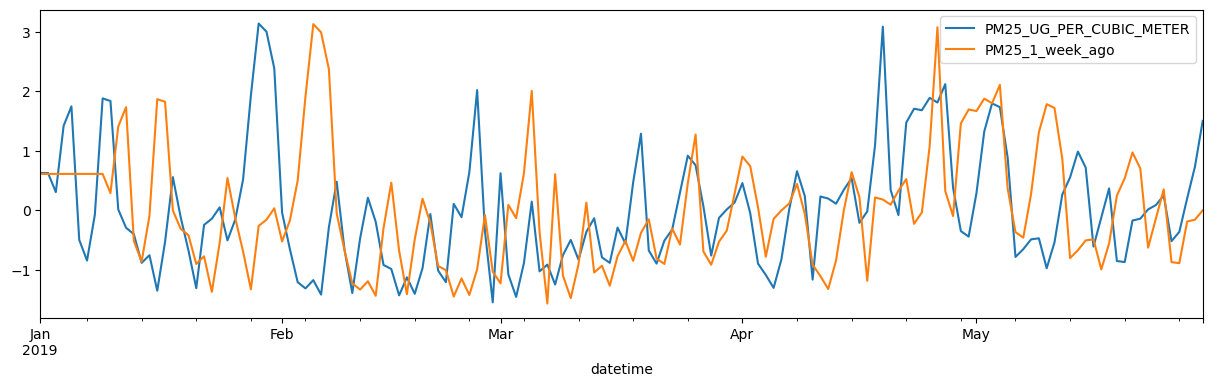

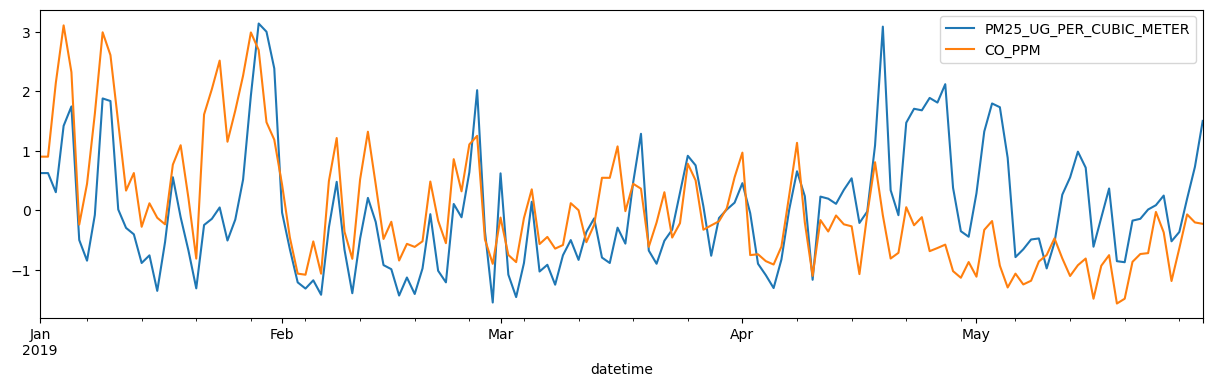

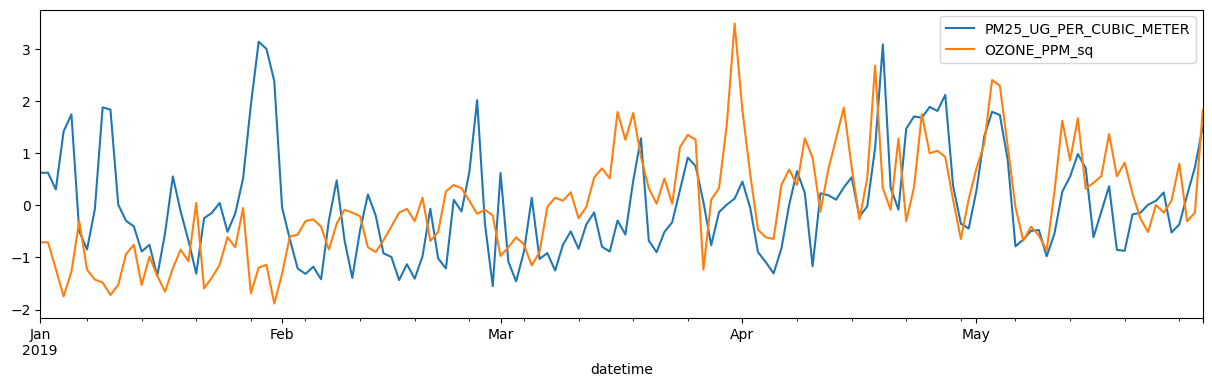

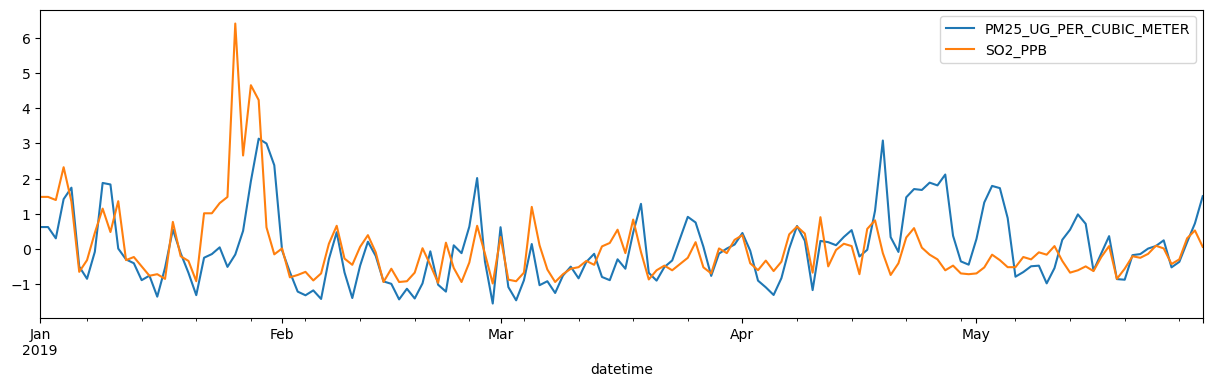

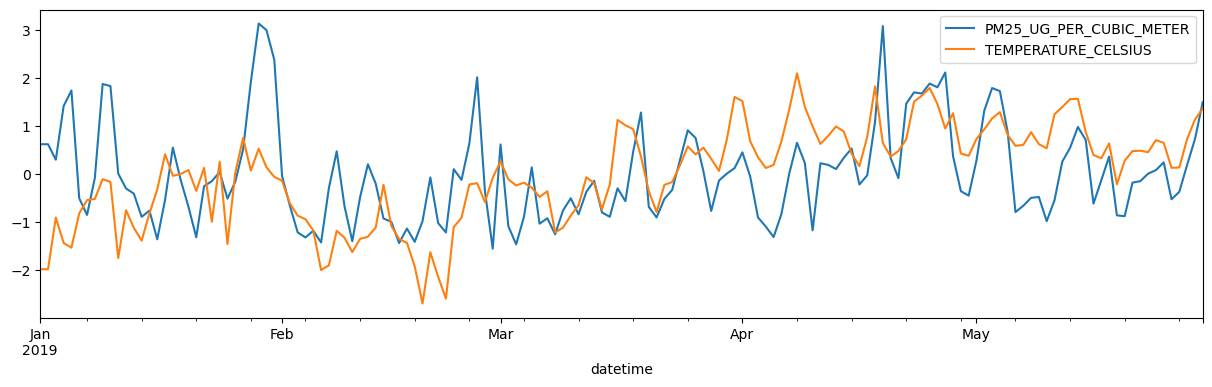

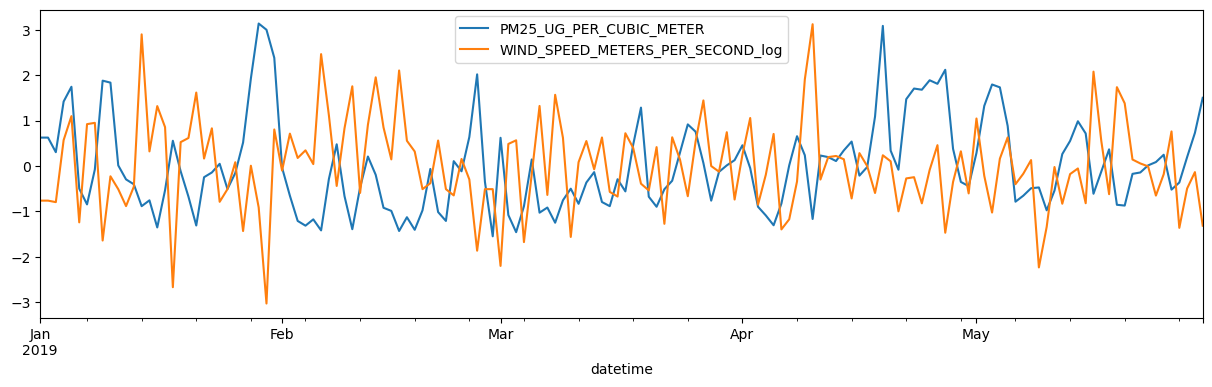

In [ ]:
for feature in ['PM25_1_week_ago', 'CO_PPM', 'OZONE_PPM_sq', 'SO2_PPB', 'TEMPERATURE_CELSIUS', 'WIND_SPEED_METERS_PER_SECOND_log']:
    multivariate_plot(df_normed[:150], 'PM25_UG_PER_CUBIC_METER', feature, 15, 4, norm=True)

In [ ]:
df = df_normed[['PM25_1_week_ago', 'CO_PPM', 'OZONE_PPM_sq', 'SO2_PPB', 'TEMPERATURE_CELSIUS', 'WIND_SPEED_METERS_PER_SECOND_log']]